In [1]:
import numpy as np
import pandas as pd
import seaborn as sns  # pandas aware plotting library
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from datetime import datetime, date, timedelta
import time
import matplotlib.ticker as ticker

# Compare Blocks of time over multiple year

Region: USA
Length of MA: 5
MA ends on: -11-11

1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
Time elapsed (hh:mm:ss.ms) 50.01693415641785


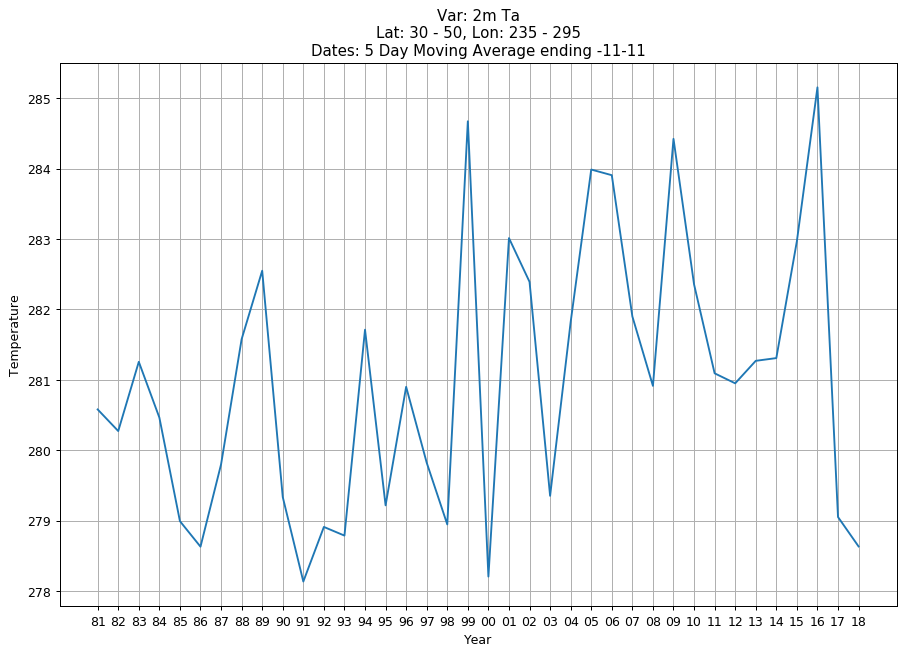

In [2]:
start_time = time.time() 

import datetime
time_hold=datetime.datetime.now()
time_stamp=(time_hold.strftime("%Y%m%d_%H_%M"))

from datetime import datetime, date, timedelta
import time

############################################################
# Comments
#### The moving average calculates the x number of preceeding values i.e., the 10 DMA for June 10th 
# is equivalent to the average from June 1st through June 10th

#Dimensions:  (lat: 73, lon: 144, time: 365)
#Coordinates:
#  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
#  * time     (time) datetime64[ns] 2010-01-01 2010-01-02 2010-01-03 ...
#  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 77.5 75.0 72.5 70.0 67.5 ...

# North-East Canada Coordinates
# Lat: 45 to 65
# Lon: 55 (305) to 85 (275)

# US Coordinates
# Lat: 30 to 50
# Lon: 65 (295) to 125 (235)
############################################################
#User Defined Parameters

Start_Date='1981-01-01'
End_Date  ='2018-11-11'

# Notes on Lat/Lon - In xarray you must provide the lat range from north to south
Lat_Start  = 30    # 45
Lat_End    = 50    # 65 
Lon_Start  = 235   # 275 
Lon_End    = 295   # 305 

LengthMA=5
MA_End='-11-11'
Region = 'USA'

print('Region: ' + Region)
print('Length of MA: ' + str(LengthMA))
print('MA ends on: ' + MA_End)
print()

file1 ='https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/surface/air.sig995.'
var_hold='file.air'
var='airTemp.sel(lon=slice(Lon_Start,Lon_End), lat=slice(Lat_End,Lat_Start))'

#Parameters
year_range=pd.period_range(Start_Date, End_Date, freq='1y')
#year_range=pd.period_range(Start_Date, End_Date, freq='1y')
#year_range=pd.period_range(Start_Date, End_Date, freq='1m')

airTempSubsetValues=[]
airTempSubsetValuesTotal=[]

############################################################
#Calculations
year=int(str(min(year_range)))
for row in year_range:
    print(year)
    file= xr.open_dataset(file1 + str(year) + '.nc')
    airTemp=eval(var_hold) # file.air
    airTempSubset=eval(var)
    if year==int(str(min(year_range))):
        airTempSubsetValues=airTempSubset
    else:
        airTempSubsetValues=np.concatenate((airTempSubsetValues, airTempSubset), axis=0, out=None)
    
    year=year+1
    
time_counter=0
dims=airTempSubsetValues.shape[1]*airTempSubsetValues.shape[2]
for row in airTempSubsetValues: 
    airTempSubsetValuesHold=(sum(sum(airTempSubsetValues[time_counter,:,:])))/dims
    airTempSubsetValuesTotal.append(airTempSubsetValuesHold)
    time_counter=time_counter+1

time_elapsed = time.time() - start_time 
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

############################################################
# Save and Export

#print(airTempSubsetValuesTotal)
pd_hold=pd.DataFrame()
lenTS=len(airTempSubsetValues)-1
Start_Date_convert = datetime.strptime(Start_Date, "%Y-%m-%d")
pd_hold= pd.DataFrame(pd.period_range(Start_Date_convert, Start_Date_convert + timedelta(days=lenTS), freq='1d'))
pd_hold[1] = pd.DataFrame(airTempSubsetValuesTotal)
pd_hold[2] = pd_hold[1].rolling(LengthMA).mean()
# pd_hold.to_csv("/Users/davidmargolin/Desktop/Python/CanadaTa_20170713_Test.csv")
pd_hold.to_csv("/Users/davidmargolin/Desktop/Python/Data/" + Region + "_Daily2mT_" + time_stamp + ".csv")

############################################################
# Select dates to plot (usually applied to the moving average time series)
temp=[]
index=0;
year=int(str(min(year_range)))
for row in airTempSubsetValues:
    date_hold= str(year) + MA_End
    if str(pd_hold[0].iloc[index])== date_hold:
        temp.append(pd_hold[2].iloc[index])
        year=year+1
    index=index+1

############################################################
# Plotting
fig, ax = plt.subplots(1,1,figsize=(12,8), dpi=90) #facecolor='w', edgecolor='k')
plt.plot(temp)
plt.xlabel('Year')
plt.ylabel('Temperature')
title_hold='Var: 2m Ta' + "\n" + 'Lat: ' + str(Lat_Start) + ' - ' + \
           str(Lat_End) + ', Lon: ' + str(Lon_Start) + ' - ' + \
           str(Lon_End) + "\n"                               + \
           'Dates: ' + str(LengthMA) + ' Day Moving Average ending ' + MA_End

plt.title(title_hold)

ax.set_xticks(np.arange(0,len(year_range),1))
ax.set_xticklabels(year_range.strftime("%y"))

#plt.ylim(55,95)
plt.grid(True)




############################################################
# Misc
#   airTempSubsetValues.append(airTempSubset.values)
#   airTempSubset=airTemp.isel(lon=slice(110,123), lat=slice(10,19))

# Compare a current block of time to the mean, max, and min from Previous Year

Daily Mean Temperature

Start of Series : 1981-01-01
End of Series   : 2018-11-13

Start of Analysis Period : 2018-08-10
End of Analysis Period   : 2019-08-10

Start of Climo Period : 1988-08-10
End of Climod Period  : 2018-08-10


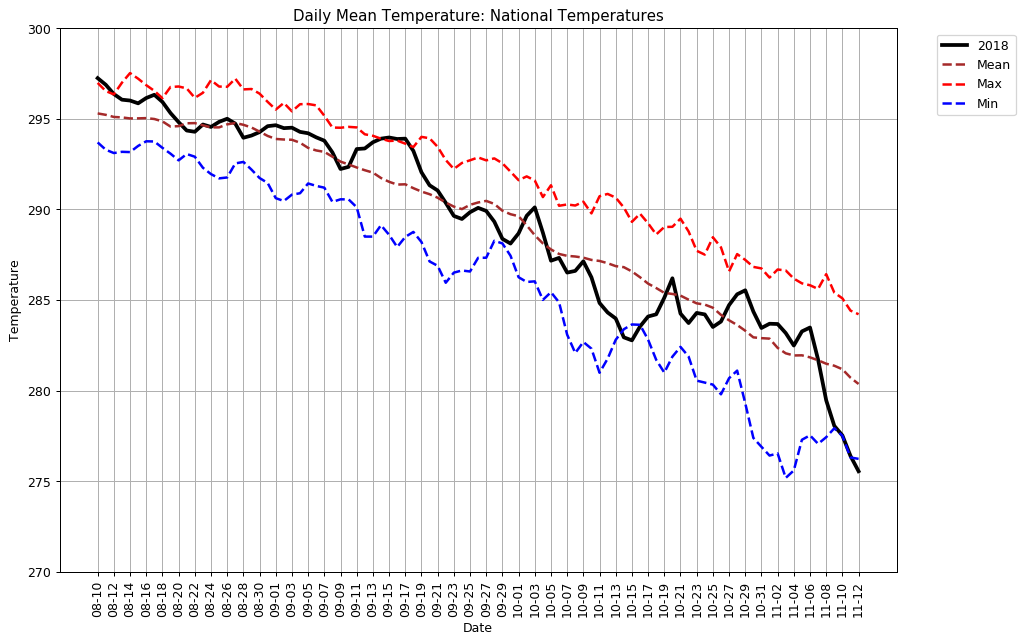

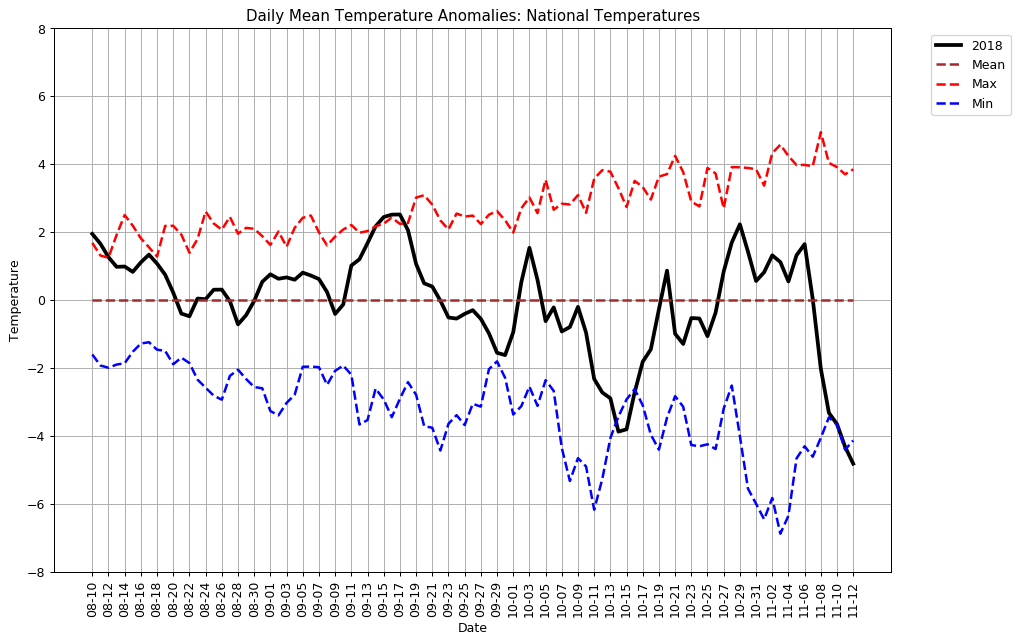

In [122]:
MeanTemps=[]
TempType=[]

TempTypeAnalysis=[]
TempTypeClimo=[]

TempTypeAnalysisSeries=pd.DataFrame()
TempTypeAnalysisSeries_Current=pd.DataFrame()

TempTypeClimoSeries=pd.DataFrame()
TempTypeClimoSeries_Current=pd.DataFrame()

AnomalyAnalysisSeries=pd.DataFrame()
AnomalyAnalysisSeries_Current=pd.DataFrame()

AnomalyClimoSeries=pd.DataFrame()
AnomalyClimoSeries_Current=pd.DataFrame()

#################################
#User Defined Parameters

Start_Date_series='1981-01-01'  #*** May be earlier
End_Date_series  ='2018-11-13'

Dates=pd.period_range(Start_Date_series, End_Date_series, freq='1d')

XLab='2d' 
XTic=2 
lenTS=94

Start_Date_analysis=pd.Period('2018-08-10')
End_Date_analysis=  pd.Period('2019-08-10')

Start_Date_climo=   pd.Period('1988-08-10')  # month/day must be same as analysis
End_Date_climo=     pd.Period('2018-08-10')  # month/day must be same as analysis

index=pd.period_range(Start_Date_analysis, Start_Date_analysis + timedelta(days=lenTS), freq=XLab)

year_analysis=Start_Date_analysis.year 
year_climo=Start_Date_climo.year
month=Start_Date_analysis.month
day  =Start_Date_analysis.day

TempType=MeanTemps
TempLabel='Daily Mean Temperature'
    
##############################
print(TempLabel)
print("")
print('Start of Series : ' + Start_Date_series)
print('End of Series   : ' + End_Date_series)
print("")
print('Start of Analysis Period : ' + str(Start_Date_analysis))
print('End of Analysis Period   : ' + str(End_Date_analysis))
print("")
print('Start of Climo Period : ' + str(Start_Date_climo))
print('End of Climod Period  : ' + str(End_Date_climo))


##################################################
# Calculations for analysis temperatures
i=0;
for row in Dates:
    MeanTemps.append(airTempSubsetValuesTotal[i])
    i=i+1    
    
i=0;j=0;TempType=MeanTemps
year_counter=year_analysis + 1
for row in Dates:
    if str(Dates[i])>=str(Start_Date_analysis) and str(Dates[i])<=str(End_Date_analysis):
        TempTypeAnalysis.append(TempType[i])
        if str(Dates[i])==str(date(year_counter, month, day) - timedelta(days=1)):  #d.replace(day=26) == date(2002, 12, 26)
            TempTypeAnalysisSeries[j]=TempTypeAnalysis[0:(lenTS+1)]  # Keep 100 days
            TempTypeAnalysis=[]
            year_counter=year_counter+1
            j=j+1
    i=i+1
TempTypeAnalysisSeries_Current[0]=TempTypeAnalysis[0:(lenTS+1)]  # Keep 100 days

##################################################    
# Calculations for max,min and normal temperatures    

i=0;j=0;
year_counter=year_climo + 1
for row in Dates:
    if str(Dates[i])>=str(Start_Date_climo) and str(Dates[i])<=str(End_Date_climo):
        TempTypeClimo.append(TempType[i])
        if str(Dates[i])==str(date(year_counter, month, day) - timedelta(days=1)):  #d.replace(day=26) == date(2002, 12, 26)
            TempTypeClimoSeries[j]=TempTypeClimo[0:(lenTS+1)]  # Keep 100 days
            TempTypeClimo=[]
            year_counter=year_counter+1
            j=j+1
    i=i+1
    

# Plot #############################################
fig, ax = plt.subplots(1,1,figsize=(12,8), dpi=90) #facecolor='w', edgecolor='k')

i=0
year=year_analysis
for row in TempTypeAnalysisSeries.columns:
    ax.plot(TempTypeAnalysisSeries[i], label=year, linewidth=1)
    i=i+1
    year=year+1
if TempTypeAnalysisSeries_Current.empty:
    print("")
else:
    ax.plot(TempTypeAnalysisSeries_Current[0], label='2018', linewidth=3, color='black') # 2018
    

ax.plot(TempTypeClimoSeries.values.mean(1), label='Mean',linestyle='--',  linewidth=2, color='brown') # Mean
ax.plot(TempTypeClimoSeries.values.max(1), label='Max',  linestyle='--',  linewidth=2, color='red') # Max
ax.plot(TempTypeClimoSeries.values.min(1), label='Min',  linestyle='--',  linewidth=2, color='blue') # Min

plt.legend(bbox_to_anchor=(1.15,1), loc="upper right")

##### Set axes
plt.ylim(270,300)

# Labeling
plt.xlabel('Date')
plt.ylabel('Temperature')
title_hold=TempLabel + ': National Temperatures'
plt.title(title_hold)

ax.set_xticklabels(index.strftime("%m-%d"))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_xticks(np.arange(0,lenTS+1,XTic))

plt.xticks(rotation=90) #fig.autofmt_xdate(rotation=90, ha='center')
plt.grid(True)

########################################################
# Calculation for Anomalies
j=0
for row in TempTypeAnalysisSeries:
     AnomalyAnalysisSeries[j]=TempTypeAnalysisSeries[j] - TempTypeClimoSeries.mean(axis=1)
     j=j+1

if TempTypeAnalysisSeries_Current.empty:    
    print("")
else:
    AnomalyAnalysisSeries_Current[0]=TempTypeAnalysisSeries_Current[0] - TempTypeClimoSeries.mean(axis=1)

j=0
for row in TempTypeClimoSeries:
     AnomalyClimoSeries[j]=TempTypeClimoSeries[j] - TempTypeClimoSeries.mean(axis=1)
     j=j+1
    
#######################################################   
# Plot #3 for Anomalies
fig, ax = plt.subplots(1,1,figsize=(12,8), dpi=90) #facecolor='w', edgecolor='k')
i=0
year=Start_Date_analysis.year
for row in TempTypeAnalysisSeries.columns:
    ax.plot(AnomalyAnalysisSeries[i], label=year, linewidth=1)
    i=i+1
    year=year+1 
if TempTypeAnalysisSeries_Current.empty:
    print("")
else:
    ax.plot(AnomalyAnalysisSeries_Current[0], label='2018', linewidth=3, color='black') # 2018
ax.plot(AnomalyClimoSeries.values.mean(1), label='Mean',linestyle='--', linewidth=2, color='brown') # Mean
ax.plot(AnomalyClimoSeries.values.max(1),  label='Max', linestyle='--', linewidth=2, color='red') # Max
ax.plot(AnomalyClimoSeries.values.min(1),  label='Min', linestyle='--', linewidth=2, color='blue') # Min
plt.legend(bbox_to_anchor=(1.15,1), loc="upper right")
plt.ylim(-8,8)

# Labeling
plt.xlabel('Date')
plt.ylabel('Temperature')
title_hold=TempLabel + ' Anomalies: National Temperatures'
plt.title(title_hold)

ax.set_xticklabels(index.strftime("%m-%d"))
ax.set_xticks(np.arange(0,lenTS+1,XTic))

plt.xticks(rotation=90) #fig.autofmt_xdate(rotation=90, ha='center')
plt.grid(True)